In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

atributes = ['MobileName','RAM_GB','ROM_GB', 'Ratings', 'Reviews', 'Stars', 'ListPrice', 'SalesPrice']
data_por = pd.read_csv("MobilePhones.csv",usecols=atributes)
data_por['Brand'] = data_por['MobileName'].apply(lambda x : x.split()[0])
data_por['Brand'] = data_por['Brand'].apply(lambda x : 'I Kall' if x == 'I' else x)
data_por.head()


MobileName  RAM_GB  ROM_GB  Ratings  Reviews  Stars  \
0      Redmi 8 (Onyx Black, 64 GB)       4      64   674638    50064    4.4   
1  Realme 5i (Forest Green, 64 GB)       4      64   243106    16497    4.5   
2     Realme 5i (Aqua Blue, 64 GB)       4      64   243106    16497    4.5   
3   Redmi 8 (Sapphire Blue, 64 GB)       4      32   674638    50064    4.4   
4  POCO X2 (Matrix Purple, 128 GB)       6      64   133486    14732    4.5   

   ListPrice  SalesPrice   Brand  
0      10999        9999   Redmi  
1      10999       10999  Realme  
2      10999       10999  Realme  
3      10999        9999   Redmi  
4      19999       18499    POCO

Realme      33
OPPO        16
Vivo        16
I Kall      13
Apple       11
Redmi       10
Infinix      8
POCO         5
Tecno        3
Motorola     3
Lava         1
Nokia        1
Name: Brand, dtype: int64


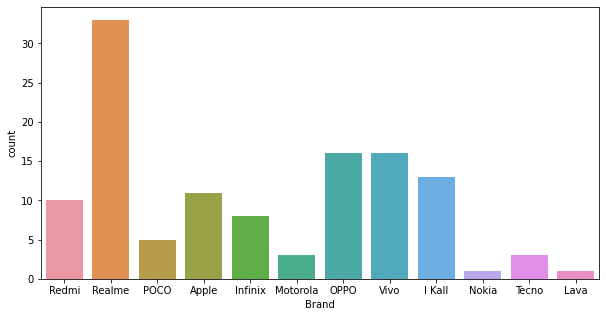

In [2]:
print(data_por['Brand'].value_counts())

plt.figure(figsize=(10,5))
sns.countplot('Brand', data=data_por)

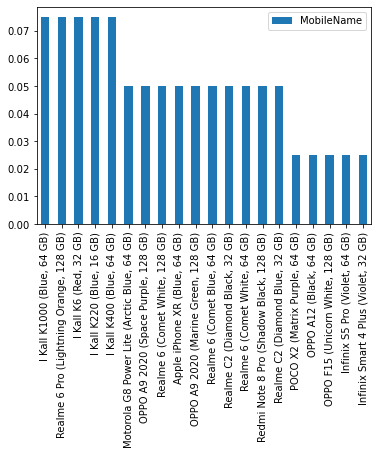

In [3]:
#Raspodela proizvoda po imenu telefona

data_temp = (data_por["MobileName"].value_counts()[:20])
MobileName = pd.DataFrame(data_temp/data_temp.sum())
MobileName.columns=["MobileName"]
MobileName.plot.bar()
plt.show()

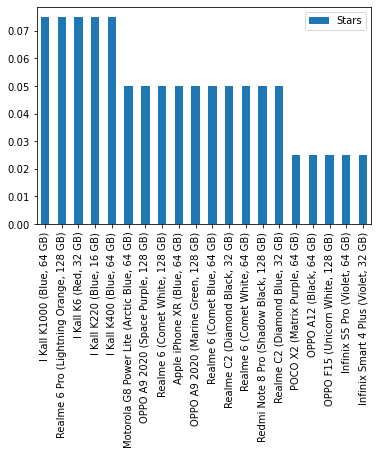

In [4]:
#Raspodela proizvoda po zvezdicama

Stars = pd.DataFrame(data_temp/data_temp.sum())
Stars.columns=["Stars"]
Stars.plot.bar()
plt.show()

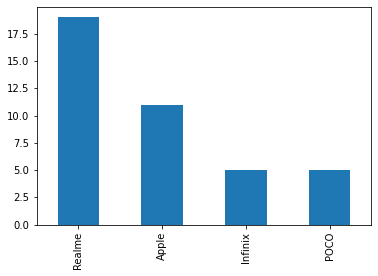

In [5]:
#Prikaz brendova sa vecim ocenama od 4.4

data_temp1 = data_por.loc[data_por["Stars"]>4.4,"Brand"]
data_temp1=data_temp1.value_counts()
data_temp1.plot.bar()
plt.show()

In [30]:
data_temp1 = data_por["Stars"].value_counts()
data_temp1

4.4    40
4.5    28
4.3    19
4.6    12
4.2     7
2.8     3
3.1     3
2.9     3
3.0     3
4.1     1
3.4     1
Name: Stars, dtype: int64

In [35]:
data_temp = data_por.loc[data_por["Ratings"]>2000,"Stars"]
data_temp=data_temp.value_counts()
data_temp

4.4    38
4.5    28
4.3    15
4.6    12
4.2     2
3.4     1
Name: Stars, dtype: int64

In [36]:
#Uslovna verovatnoća 

data_temp1 = data_por["Stars"].value_counts()

P_Uslovna_Verovatnoca = pd.DataFrame(data_temp/data_temp1)
P_Uslovna_Verovatnoca.columns = ["Uslovna Verovatnoca"]
P_Uslovna_Verovatnoca

Uslovna Verovatnoca
2.8                  NaN
2.9                  NaN
3.0                  NaN
3.1                  NaN
3.4             1.000000
4.1                  NaN
4.2             0.285714
4.3             0.789474
4.4             0.950000
4.5             1.000000
4.6             1.000000

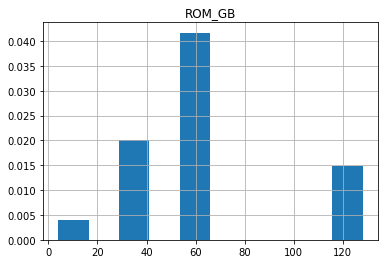

In [9]:
#Prikaz histograma rom

import pandas as pd

atributes = ['ROM_GB']
df = pd.read_csv("MobilePhones.csv",usecols=atributes)

hist = df.hist(density=True,bins=10) 
plt.show()

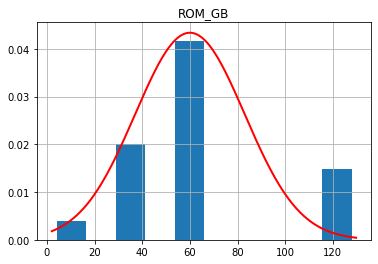

In [10]:
#Gausova kriva
#OVDE MORAS DA PODESAVAS PARAMETRE ZA CRVENU LINIJU
from scipy.stats import norm

hist = df.hist(density=True,bins=10)

step=0.3
x = np.arange(2, 130, step)
m=60
sig=23
P_norm = norm.pdf(x, m, sig)

plt.plot(x, P_norm*2.5, 'r', linewidth=2.0)
plt.show()

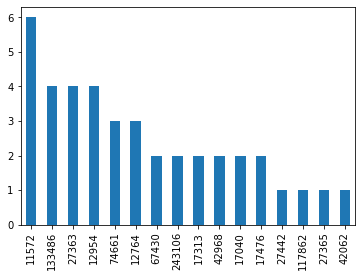

In [11]:
#Treba postaviti filter i prikazati koji su telefoni sa visokom ocenom

data_temp1 = data_por.loc[data_por["Stars"]>4.4,"Ratings"]
data_temp1=data_temp1.value_counts()
data_temp1.plot.bar()
plt.show()

dobre: 
106
srednje: 
120
lose: 
6


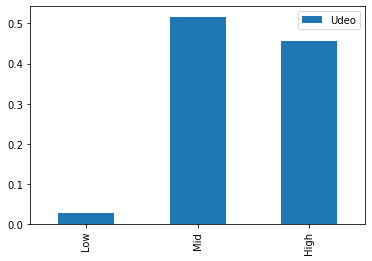

In [37]:
#U dobre telefone spadaju telefoni sa ocenom vecom od 4.1
#U srednje telefone spadaju telefoni sa ocenom izmedju 3 i 4.1
#U lose telefone spadaju telefoni sa ocenom nizom od 3


Stars_high_value = (data_por["Stars"] > 4.1).value_counts()
Stars_mid_value = ((data_por["Stars"] >= 3) & (data_por["Stars"]) <= 4.1).value_counts()
Stars_low_value = (data_por["Stars"] < 3).value_counts()


high = Stars_high_value[True]
print("dobre: ")
print(high)
mid = Stars_mid_value[True]
print("srednje: ")
print(mid)
low = Stars_low_value[True]
print("lose: ")
print(low)

P_Rezultat = pd.DataFrame([low, mid, high]/(low + mid + high))
P_Rezultat.columns=["Udeo"]
P_Rezultat.index = ["Low", "Mid", "High"]
P_Rezultat.plot.bar()
plt.show()

dobre, srednje i lose :
---------------------------------------------------
dobre: 
92
srednje: 
120
lose: 
67


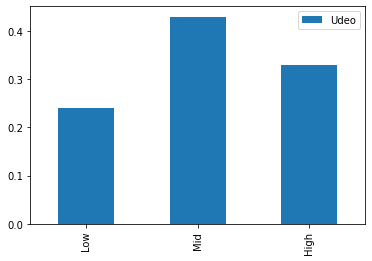

In [38]:
#U dobre telefone spadaju telefoni sa rejtingom vecom od 5000
#U srednje telefone spadaju telefoni sa rejtingom izmedju 5000 i 20000
#U lose telefone spadaju telefoni sa rejtingom nizom od 20000


Ratings_high_value = (data_por["Ratings"] > 5000).value_counts()
Ratings_mid_value = ((data_por["Ratings"] >= 20000) & (data_por["Ratings"]) <= 50000).value_counts()
Ratings_low_value = (data_por["Ratings"] < 20000).value_counts()

print("dobre, srednje i lose :")
print("---------------------------------------------------")
high = Ratings_high_value[True]
print("dobre: ")
print(high)
mid = Ratings_mid_value[True]
print("srednje: ")
print(mid)
low = Ratings_low_value[True]
print("lose: ")
print(low)

P_Rezultat = pd.DataFrame([low, mid, high]/(low + mid + high))
P_Rezultat.columns=["Udeo"]
P_Rezultat.index = ["Low", "Mid", "High"]
P_Rezultat.plot.bar()
plt.show()

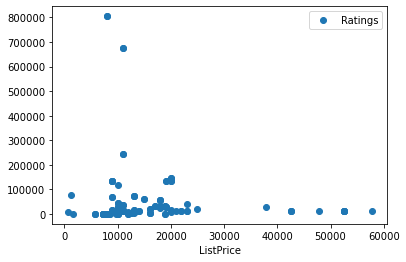

                            OLS Regression Results                            
Dep. Variable:              ListPrice   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.048
Date:                Fri, 22 Jan 2021   Prob (F-statistic):              0.155
Time:                        02:22:25   Log-Likelihood:                -1291.0
No. Observations:                 120   AIC:                             2586.
Df Residuals:                     118   BIC:                             2592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.691e+04   1137.244     14.870      0.0

In [54]:
#Linearna regresija
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

df = pd.read_csv('MobilePhones.csv')
df.plot('ListPrice', 'Ratings', style='o')
plt.show()

Regresija= sm.ols('ListPrice ~ Ratings', df).fit()
print(Regresija.summary())

In [15]:
#Visestruka regresija

df = pd.read_csv('MobilePhones.csv')

Rez= sm.ols('ListPrice ~ SalesPrice + Ratings ', df).fit()
print(Rez.summary())

                            OLS Regression Results                            
Dep. Variable:              ListPrice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3344.
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          5.87e-104
Time:                        01:58:01   Log-Likelihood:                -1048.3
No. Observations:                 120   AIC:                             2103.
Df Residuals:                     117   BIC:                             2111.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    479.0830    252.785      1.895      0.0

In [41]:
#Polinomska regresija

attributes = ['ListPrice', 'SalesPrice']
df = pd.read_csv('MobilePhones.csv', usecols=attributes)
df.columns = ['ListPrice', 'SalesPrice']
df.head()
df.describe()

ListPrice    SalesPrice
count    120.000000    120.000000
mean   16277.375000  14686.791667
std    11525.593599  10591.813483
min      609.000000    609.000000
25%     9990.000000   8302.250000
50%    12994.500000  10999.000000
75%    18990.000000  16999.000000
max    57800.000000  52999.000000

In [56]:
#Koeficijent korelacije ListPrice i SalesPrice ocena

data_por.cov()['ListPrice']['Stars']/(data_por.std()['ListPrice']*data_por.std()['Stars'])

0.38041196048977266

In [18]:
#Medijana, standardna devijacija, aritmeticka sredina, matrica kovarijanse
atributi = ['MobileName','RAM_GB','ROM_GB', 'Ratings', 'Reviews', 'Stars', 'ListPrice', 'SalesPrice']
data_por = pd.read_csv("MobilePhones.csv", usecols=atributi)
data_por.head()

#Medijana

med_Ratings = data_por['Ratings'].median()
med_Reviews = data_por['Reviews'].median()


#Standardna devijacija

std_Ratings = data_por['Ratings'].std()
std_Reviews = data_por['Reviews'].std()


#Aritmeticka sredina

sr_vr_Ratings = data_por['Ratings'].mean()
sr_vr_Reviews = data_por['Reviews'].mean()


print("Ratings")
print("Medijana:")
print(med_Ratings)
print("Standardna devijacija:")
print(std_Ratings)
print("Aritmeticka sredina")
print(sr_vr_Ratings)
print("------------------------")
print("Reviews")
print("Medijana:")
print(med_Reviews)
print("Standardna devijacija:")
print(std_Reviews)
print("Aritmeticka sredina")
print(sr_vr_Reviews)

print("MATRICA KOVARIJANSE:")
print(data_por.cov())

Ratings
Medijana:
15700.5
Standardna devijacija:
136188.05411238788
Aritmeticka sredina
57315.425
------------------------
Reviews
Medijana:
1232.0
Standardna devijacija:
10853.881054893753
Aritmeticka sredina
4767.25
MATRICA KOVARIJANSE:
                  RAM_GB         ROM_GB       Ratings       Reviews  \
RAM_GB         17.055392       7.756022 -3.335293e+04 -2.123351e+03   
ROM_GB          7.756022    1140.919888 -5.186253e+05 -3.560078e+04   
Ratings    -33352.926681 -518625.335294  1.854719e+10  1.469399e+09   
Reviews     -2123.350840  -35600.781513  1.469399e+09  1.178067e+08   
Stars          -0.226723       3.360672  9.629446e+03  8.002513e+02   
ListPrice  -13840.782563   73965.987395 -2.050109e+08 -1.439515e+07   
SalesPrice -12762.227241   72517.502801 -1.806463e+08 -1.259831e+07   

                  Stars     ListPrice    SalesPrice  
RAM_GB        -0.226723 -1.384078e+04 -1.276223e+04  
ROM_GB         3.360672  7.396599e+04  7.251750e+04  
Ratings     9629.445714 -2.050